<a href="https://colab.research.google.com/github/Lufsenna/3-fase---1-Desafio-do-Challenge-Alura-Store/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [55]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [56]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

df_combinado_com_loja = pd.concat([loja, loja2, loja3, loja4])
df_combinado_com_loja.columns = df_combinado_com_loja.columns.str.strip()
df_combinado_com_loja['Preço'] = pd.to_numeric(df_combinado_com_loja['Preço'], errors='coerce')

faturamento_por_loja_agrupado = df_combinado_com_loja.groupby('Loja')['Preço'].sum()
print('Faturamento por Loja (Agrupado por coluna Loja):')
print(faturamento_por_loja_agrupado.apply(lambda x: "R$ {:,.2f}".format(x).replace(",", "X").replace(".", ",").replace("X", ".")))

Faturamento por Loja (Agrupado por coluna Loja):
Loja
Loja 1    R$ 1.534.509,12
Loja 2    R$ 1.488.459,06
Loja 3    R$ 1.464.025,03
Loja 4    R$ 1.384.497,58
Name: Preço, dtype: object


# 2. Vendas por Categoria

In [57]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

for df, nome in zip(lojas, nomes_lojas):
    quantidade_categoria = (
        df.groupby("Categoria do Produto")["Produto"]
        .count()
        .reset_index()
        .rename(columns={"Produto": "Quantidade Vendida"})
        .sort_values(by="Quantidade Vendida", ascending=False)
    )
    print(f'\n{nome}:')
    display(quantidade_categoria)


Loja 1:


,Categoria do Produto,Quantidade Vendida
6,moveis,465
2,eletronicos,448
0,brinquedos,324
1,eletrodomesticos,312
3,esporte e lazer,284
4,instrumentos musicais,182
5,livros,173
7,utilidades domesticas,171



Loja 2:


,Categoria do Produto,Quantidade Vendida
6,moveis,442
2,eletronicos,422
0,brinquedos,313
1,eletrodomesticos,305
3,esporte e lazer,275
4,instrumentos musicais,224
5,livros,197
7,utilidades domesticas,181



Loja 3:


,Categoria do Produto,Quantidade Vendida
6,moveis,499
2,eletronicos,451
0,brinquedos,315
1,eletrodomesticos,278
3,esporte e lazer,277
5,livros,185
4,instrumentos musicais,177
7,utilidades domesticas,177



Loja 4:


,Categoria do Produto,Quantidade Vendida
6,moveis,480
2,eletronicos,451
0,brinquedos,338
3,esporte e lazer,277
1,eletrodomesticos,254
7,utilidades domesticas,201
5,livros,187
4,instrumentos musicais,170


# 3. Média de Avaliação das Lojas


In [58]:
media_avaliacao = (
    df_combinado_com_loja
        .groupby('Loja', as_index=False)['Avaliação da compra']
        .mean()
        .rename(columns={'Avaliação da compra': 'Média de Avaliação'})
        .sort_values(by='Média de Avaliação', ascending=False)
)
media_avaliacao['Média de Avaliação'] = media_avaliacao['Média de Avaliação'].round(2)

media_avaliacao

,Loja,Média de Avaliação
2,Loja 3,4.05
1,Loja 2,4.04
3,Loja 4,4.00
0,Loja 1,3.98


# 4. Produtos Mais e Menos Vendidos

In [59]:
import pandas as pd
tabela_produtos = pd.DataFrame([
{
'Loja': loja,
'Produto Mais Vendido': contagem.idxmax(),
'Quantidade Mais Vendido': contagem.max(),
'Produto Menos Vendido': contagem.idxmin(),
'Quantidade Menos Vendido': contagem.min()
}
for loja in df_combinado_com_loja['Loja'].unique()
for contagem in [df_combinado_com_loja[df_combinado_com_loja['Loja']==loja]['Produto'].value_counts()]
])
tabela_produtos

,Loja,Produto Mais Vendido,Quantidade Mais Vendido,Produto Menos Vendido,Quantidade Menos Vendido
0,Loja 1,Micro-ondas,60,Headset,33
1,Loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
2,Loja 3,Kit banquetas,57,Blocos de montar,35
3,Loja 4,Cama box,62,Guitarra,33


# 5. Frete Médio por Loja

In [60]:
custo_medio_frete = df_combinado_com_loja.groupby('Loja')['Frete'] \
    .mean() \
    .round(2) \
    .apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')) \
    .reset_index()
custo_medio_frete = custo_medio_frete.rename(columns={'Frete': 'Frete Médio por Loja'})
custo_medio_frete

,Loja,Frete Médio por Loja
0,Loja 1,"R$ 34,69"
1,Loja 2,"R$ 33,62"
2,Loja 3,"R$ 33,07"
3,Loja 4,"R$ 31,28"


# 5. 3 Gráficos

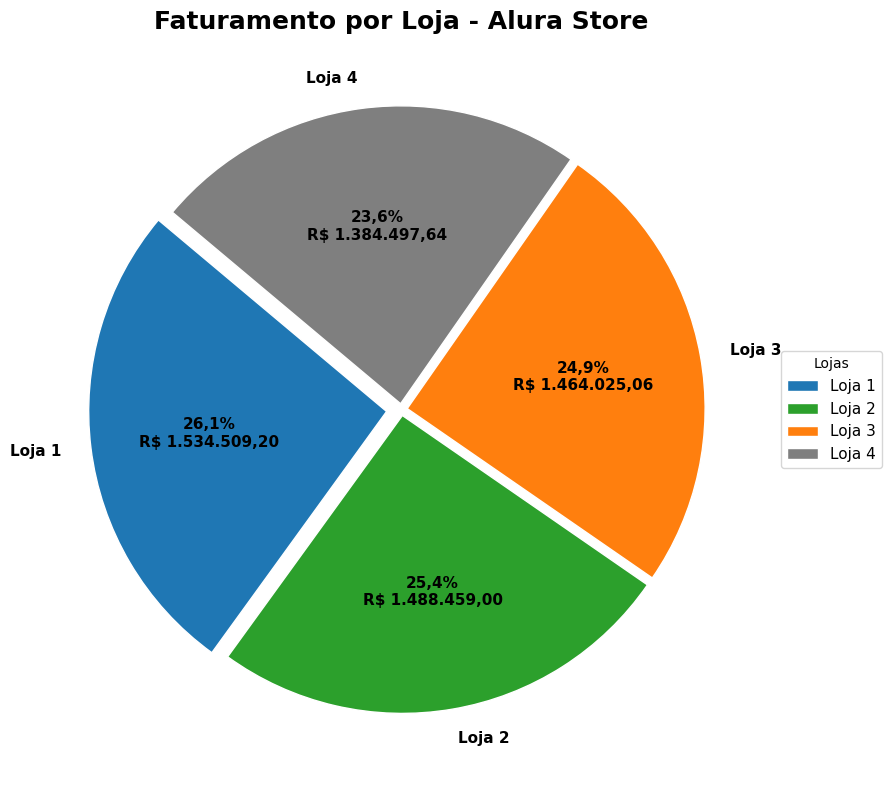

In [61]:
 import matplotlib.pyplot as plt

faturamento = faturamento_por_loja_agrupado
total_faturamento = faturamento.sum()

def format_label(p, total):
    valor = p * total / 100
    return f'{p:.1f}%\nR$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

explode = [0.02 if x != faturamento.max() else 0.05 for x in faturamento]

cores_profissionais = ['#1f77b4', '#2ca02c', '#ff7f0e', '#7f7f7f']

plt.figure(figsize=(9,9))
wedges, texts, autotexts = plt.pie(
    faturamento,
    labels=faturamento.index,
    autopct=lambda p: format_label(p, total_faturamento),
    startangle=140,
    colors=cores_profissionais,
    explode=explode,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 11, 'weight': 'bold'}
)

plt.legend(wedges, faturamento.index,
           title="Lojas", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=11)
plt.title('Faturamento por Loja - Alura Store', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

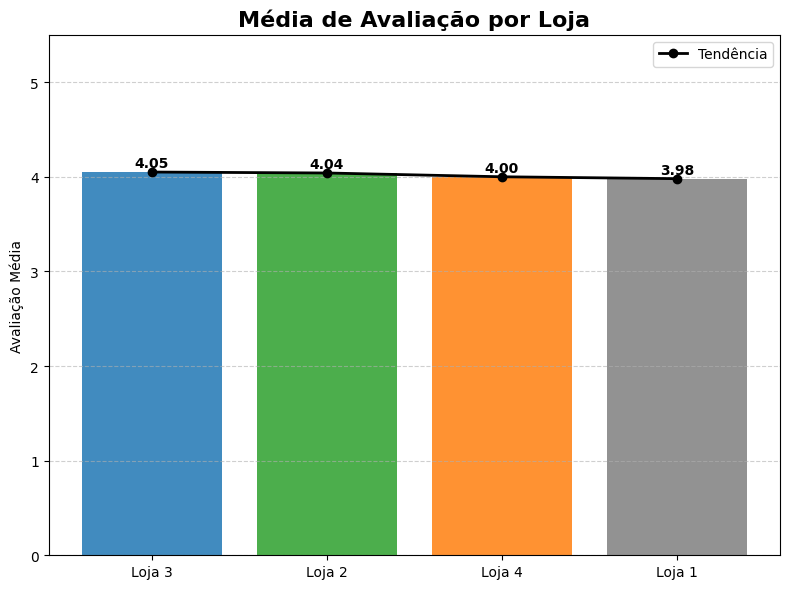

In [62]:
import matplotlib.pyplot as plt

lojas = media_avaliacao['Loja']
avaliacoes = media_avaliacao['Média de Avaliação']

cores_profissionais = ['#1f77b4', '#2ca02c', '#ff7f0e', '#7f7f7f']

fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(lojas, avaliacoes, color=cores_profissionais, alpha=0.85)
ax.plot(lojas, avaliacoes, color='black', marker='o', linewidth=2, label='Tendência')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{height:.2f}', ha='center', fontsize=10, fontweight='bold')

ax.set_title('Média de Avaliação por Loja', fontsize=16, fontweight='bold')
ax.set_ylabel('Avaliação Média')
ax.set_ylim(0, 5.5)
ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.legend()
plt.tight_layout()
plt.show()

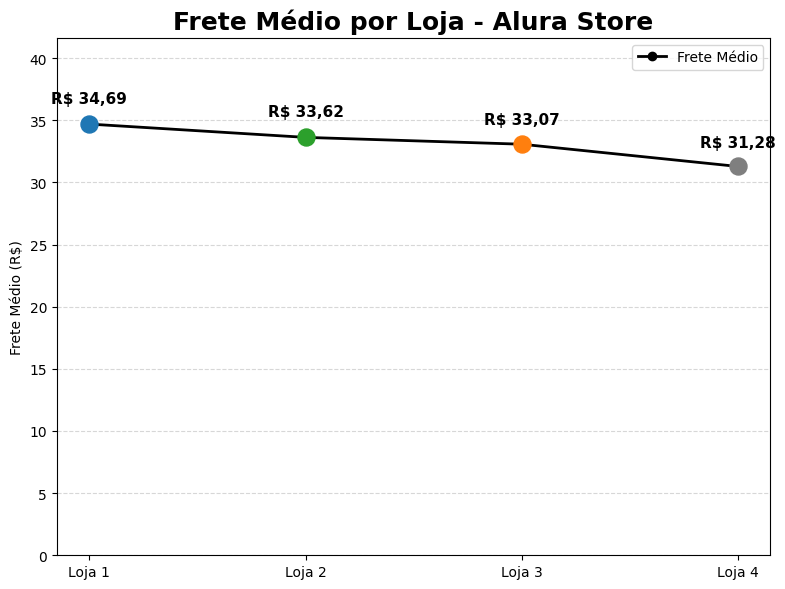

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

custo_medio_frete['Frete_Valor'] = custo_medio_frete['Frete Médio por Loja'] \
    .str.replace('R$ ', '', regex=False) \
    .str.replace('.', '', regex=False) \
    .str.replace(',', '.', regex=False) \
    .astype(float)

cores_profissionais = ['#1f77b4', '#2ca02c', '#ff7f0e', '#7f7f7f']
plt.figure(figsize=(8,6))
plt.plot(custo_medio_frete['Loja'], custo_medio_frete['Frete_Valor'],
         color='black', marker='o', linewidth=2, label='Frete Médio')

for i, (loja, valor) in enumerate(zip(custo_medio_frete['Loja'], custo_medio_frete['Frete_Valor'])):
    plt.scatter(loja, valor, color=cores_profissionais[i], s=150, zorder=5)

    plt.text(i, valor * 1.05, f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
             ha='center', fontsize=11, fontweight='bold')

plt.title('Frete Médio por Loja - Alura Store', fontsize=18, fontweight='bold')
plt.ylabel('Frete Médio (R$)')
plt.ylim(0, custo_medio_frete['Frete_Valor'].max() * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.legend()
plt.tight_layout()
plt.show()

# 6. Extra!  Análise de Desempenho Geográfico

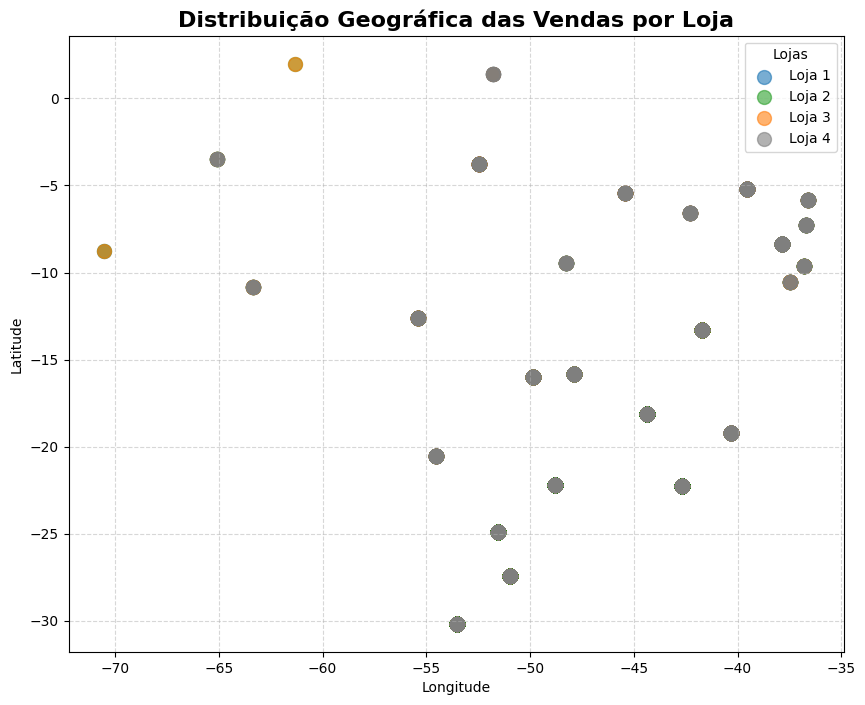

In [64]:
import matplotlib.pyplot as plt

cores_lojas = ['#1f77b4', '#2ca02c', '#ff7f0e', '#7f7f7f']
nomes_lojas = df_combinado_com_loja['Loja'].unique()

plt.figure(figsize=(10,8))

for i, loja in enumerate(nomes_lojas):
    df_loja = df_combinado_com_loja[df_combinado_com_loja['Loja'] == loja]
    plt.scatter(df_loja['lon'], df_loja['lat'],
                color=cores_lojas[i],
                label=loja,
                alpha=0.6, s=100)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição Geográfica das Vendas por Loja', fontsize=16, fontweight='bold')
plt.legend(title='Lojas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# 7. Relatório

**Conclusão e Recomendação**

**Com base nas análises**:

**Loja 4** apresenta menor faturamento, avaliações baixas, apesar de ter frete mais baixo.

Recomendamos que o Senhor João considere vender essa loja, enquanto pode focar em melhorar as operações das outras lojas com maior faturamento e satisfação, no entanto, é preciso agir com mais eficiência no que tange atendimento para que a **Loja 1**, eleve a satisfação dos clientes, pois ela teve o menor índice de satisfação.

Todas as análises são suportadas por gráficos interativos e tabelas organizadas, garantindo clareza na tomada de decisão.